In [1]:
import sys
sys.path.insert(0, '../pypkg')

import qubla as qbl
import qubla.sim as qbsim
import matplotlib.pyplot as plt

In [2]:
myqm = qbl.QuantumLogic()

myqm.compileSource('''  
    H = {0 : 1 / sqrt(2), 1 : 1 / sqrt(2)};
    n = 3;
    arrqbx = alloc(n);
    arrqby = alloc(n);
    for(i : seq(n)){
        arrqbx[i] = qstate(H)[0];
        arrqby[i] = qstate(H)[0];
    }
    x = uword{n}(arrqbx);
    y = uword{n}(arrqby);
    print("x: "+str(x));
    print("y: "+str(y));
    z = x*y;
    output(z);
    print("z: "+str(z));
''')

qbl.reduce(myqm)

print()
print("Number of qubits:", myqm.nqb)
print("Number of steps:", sum([1 for step in myqm.arrstep if step != None]))
print("Nonzero final state vector components:")
finalst = qbsim.statevec(myqm)
for i in range(len(finalst)):
    if finalst[i] != 0j:
        print(i, finalst[i])


x: [qbit[0], qbit[2], qbit[4]]
y: [qbit[1], qbit[3], qbit[5]]
z: [qbit[6], qbit[12], qbit[21], qbit[23], qbit[25], qbit[26]]

Number of qubits: 21
Number of steps: 21
Nonzero final state vector components:
0 (0.12499999999999994+0j)
1 (0.12499999999999994+0j)
2 (0.12499999999999994+0j)
4 (0.12499999999999994+0j)
5 (0.12499999999999994+0j)
8 (0.12499999999999994+0j)
10 (0.12499999999999994+0j)
16 (0.12499999999999994+0j)
17 (0.12499999999999994+0j)
20 (0.12499999999999994+0j)
21 (0.12499999999999994+0j)
32 (0.12499999999999994+0j)
34 (0.12499999999999994+0j)
40 (0.12499999999999994+0j)
42 (0.12499999999999994+0j)
67 (0.12499999999999994+0j)
518 (0.12499999999999994+0j)
583 (0.12499999999999994+0j)
649 (0.12499999999999994+0j)
715 (0.12499999999999994+0j)
32786 (0.12499999999999994+0j)
32851 (0.12499999999999994+0j)
33302 (0.12499999999999994+0j)
33367 (0.12499999999999994+0j)
37153 (0.12499999999999994+0j)
37219 (0.12499999999999994+0j)
37801 (0.12499999999999994+0j)
37867 (0.1249999999

0 0.2343749999999999
1 0.015624999999999986
2 0.031249999999999972
3 0.031249999999999972
4 0.04687499999999996
5 0.031249999999999972
6 0.062499999999999944
7 0.031249999999999972
8 0.031249999999999972
9 0.015624999999999986
10 0.031249999999999972
11 0.0
12 0.062499999999999944
13 0.0
14 0.031249999999999972
15 0.031249999999999972
16 0.015624999999999986
17 0.0
18 0.031249999999999972
19 0.0
20 0.031249999999999972
21 0.031249999999999972
22 0.0
23 0.0
24 0.031249999999999972
25 0.015624999999999986
26 0.0
27 0.0
28 0.031249999999999972
29 0.0
30 0.031249999999999972
31 0.0
32 0.0
33 0.0
34 0.0
35 0.031249999999999972
36 0.015624999999999986
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.031249999999999972
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.015624999999999986
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0


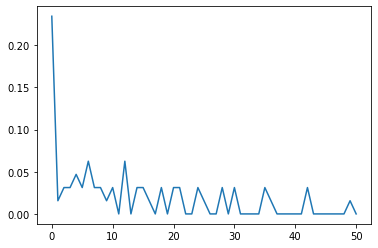

In [3]:
mydens = qbsim.getDens(finalst, qbl.getOutBits(myqm, 0, True))
for i in range(len(mydens)):
    print(i, mydens[i])
plt.plot(mydens[0:51])